In [88]:
img_name = ["Airplane","Automobile","Bird","Cat","Derr","Dog","Frog","Horse","Ship","Truck"]

In [89]:
import pandas as pd

In [90]:
import matplotlib.pyplot as plt

In [91]:
import numpy as np

In [92]:
import tensorflow as tf

In [93]:
from tensorflow.keras.datasets import cifar10 

In [94]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [95]:
x_train


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [96]:
x_train[23]

array([[[126, 100,  71],
        [102,  76,  49],
        [117,  93,  60],
        ...,
        [ 96,  74,  42],
        [113,  90,  58],
        [107,  84,  52]],

       [[135, 109,  73],
        [113,  86,  52],
        [121,  94,  56],
        ...,
        [115,  89,  58],
        [114,  89,  55],
        [115,  90,  53]],

       [[126, 102,  61],
        [124,  97,  59],
        [128, 101,  60],
        ...,
        [134, 109,  77],
        [115,  90,  55],
        [114,  90,  50]],

       ...,

       [[141, 111,  85],
        [155, 123,  87],
        [134, 102,  65],
        ...,
        [149, 140, 118],
        [147, 133, 116],
        [122, 106,  94]],

       [[153, 122,  83],
        [164, 132,  89],
        [146, 119,  81],
        ...,
        [163, 156, 147],
        [189, 178, 174],
        [184, 174, 173]],

       [[125, 100,  56],
        [129, 106,  64],
        [124, 102,  68],
        ...,
        [133, 127, 124],
        [180, 173, 174],
        [168, 162, 164]]

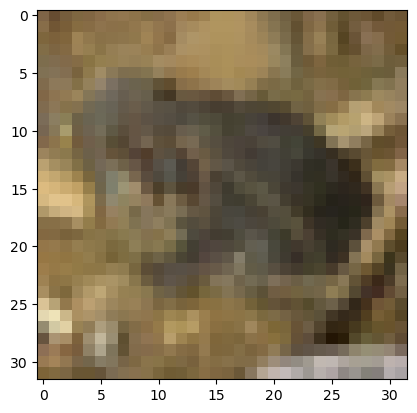

In [97]:
plt.imshow(x_train[23])

In [98]:
y_train[23]

array([6], dtype=uint8)

In [99]:
img_name[6]

'Frog'

# Scaling


In [100]:
x_train_scale = x_train /255.0

In [101]:
x_test_scale = x_test/255.0

# Sequential Mode

In [102]:
from tensorflow.keras.models import Sequential

In [103]:
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Input

In [104]:
smodel = Sequential()
smodel.add(Input(shape=(32,32,3)))

# First Convolutional Layer

In [105]:
smodel.add( Conv2D ( filters = 32 , kernel_size = (3,3) , activation = "relu" , strides= (1,1) , padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

# Second Convolutional Layer

In [106]:
smodel.add( Conv2D ( filters = 32 , kernel_size = (3,3) , activation = "relu" , strides= (1,1) , padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

# Third Convolutional Layer

In [107]:
smodel.add( Conv2D ( filters = 32 , kernel_size = (3,3) , activation = "relu" , strides= (1,1) , padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

In [108]:
smodel.add(Flatten())

# Fully Connected Layer

In [109]:
smodel.add(Dense(units=512,activation="relu"))

In [110]:
smodel.add(Dense(units=128,activation="relu"))

In [111]:
smodel.add(Dense(units=64,activation="relu"))

In [112]:
smodel.add(Dense(units=32,activation="relu"))

In [113]:
smodel.add(Dense(units=10,activation="softmax"))

In [114]:
smodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 32)         

In [115]:
smodel.compile(optimizer="adam" , loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [116]:
smodel.fit(x_train_scale,y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6383 - accuracy: 0.3882
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2910 - accuracy: 0.5327
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1503 - accuracy: 0.5903
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0592 - accuracy: 0.6235
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9766 - accuracy: 0.6551
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9145 - accuracy: 0.6802
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8585 - accuracy: 0.6972
Epoch 8/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8162 - accuracy: 0.7116
Epoch 9/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7723 - accuracy: 0.7282
Epoch 10/20
1563/1563 [==============================] - 38s 24m

In [117]:
smodel.evaluate(x_test_scale,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 1.0641 - accuracy: 0.6902


[1.0641311407089233, 0.6901999711990356]

In [128]:
x_test[210].shape

(32, 32, 3)

In [129]:
img = x_test[210].reshape((1,)+x_test[210].shape)

In [130]:
img.shape

(1, 32, 32, 3)

In [131]:
smodel.predict(img)

1/1 [==============================] - 0s 36ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [132]:
np.argmax(smodel.predict(img))

1/1 [==============================] - 0s 39ms/step


7

In [135]:
img_name[7]

'Horse'

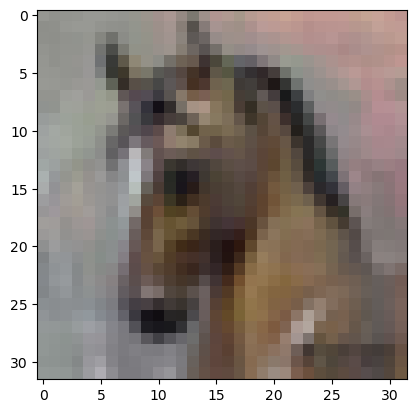

In [136]:
plt.imshow(x_test[210])

In [142]:
x_test[5252].shape

(32, 32, 3)

In [143]:
img1 = x_test[5252].reshape((1,)+x_test[5252].shape)

In [144]:
smodel.predict(img1)

1/1 [==============================] - 0s 51ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [145]:
np.argmax(smodel.predict(img1))

1/1 [==============================] - 0s 41ms/step


4

In [146]:
img_name[4]

'Derr'

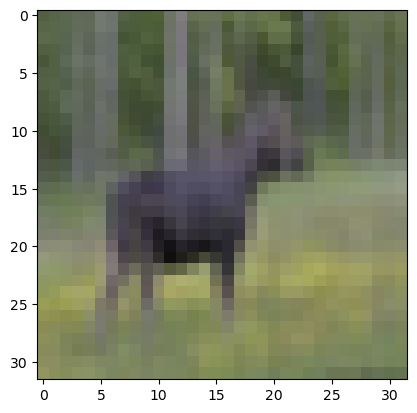

In [147]:
plt.imshow(x_test[5252])